# Chapter2: Working with Text data

## 2.2 Tokenizing the Text

In [25]:
## lets download the dataset

In [26]:
import os 
import urllib.request
if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
       "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
       "the-verdict.txt") # download the data from the url and
    file_path="the-verdict.txt" # save it to the file named "the-verdict.txt"
    urllib.request.urlretrieve(url,file_path)

Lets read the file


In [27]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text = f.read()

In [28]:
print(raw_text[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [29]:
len(raw_text)

20479

In [30]:
# re- regular expression operations. we will intially take a small example. re.split data
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text) # '\s' for whitespaces
result

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']

The result is a list of individual words, whitespaces, and punctuation characters. This simple tokenization scheme works for text to word conversion. but still some words are still connected with the punctuations. We want seprate list of these punctuations.Let's modify the regular expression to split on whitespaces (\s), commas and periods ([,.]):

In [31]:
result = re.split(r'([,.]|\s)',text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


We have a little bit of problem which is white spaces is still in the list of words. So we can remove them safely by:


In [32]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


Removing the whitespaces depends on application as here we can keep or remove it. For example, in python code indentation and spaces. Later we will keep the whitespaces. lets handle other types of punctuation, such as question marks, quotation marks, and the double-dashes.

In [33]:
import re
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


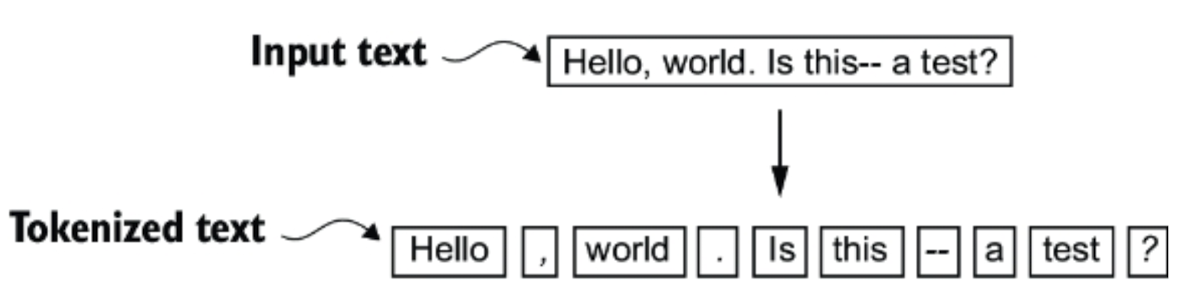

So far we have implemented the Simple tokenization, in which we split smaple text into 10 individual tokens. lets apply this simple tokenization technique to the Edith entire story.

In [34]:
print(len(result))

10


In [35]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text = f.read()

In [36]:
print(len(raw_text))

20479


In [37]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


- <b> We have 4690 text tokens without whitespaces.</b>

In [38]:
# check first 30 tokens
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## 2.3 Converting tokens into the token IDs

Now lets convert the token strings to integer. This conversion is intermediate step for the converting tokens into the vector representation i.e embedding. <br>
- To convert the tokens into token IDs we have to first build the vocabulary.
- Vocabulary defines how we map each unique word or special character a unique integer.
  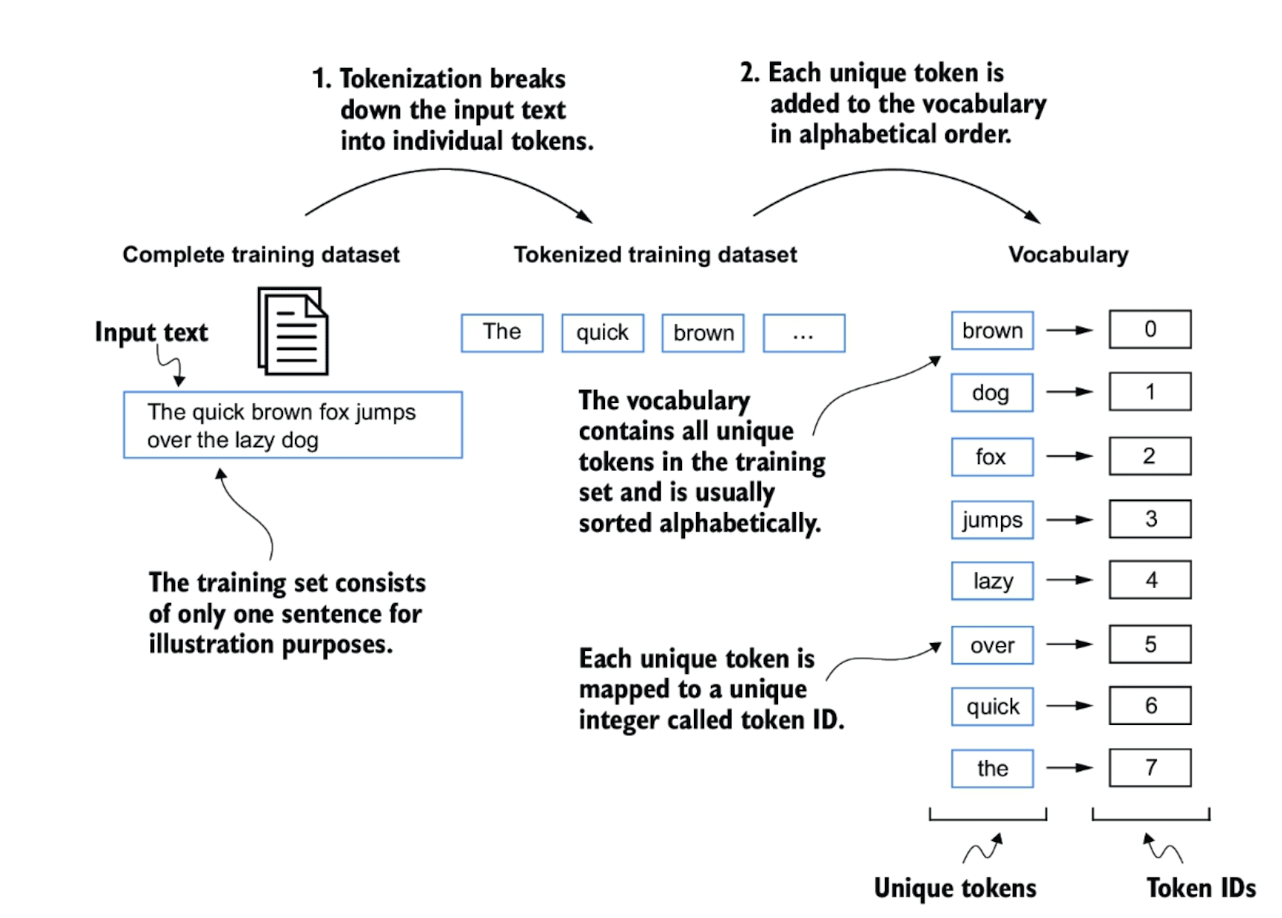
  - We build a vocabulary by tokenizing the entire text in a training dataset into individual tokens. These individual tokens are then sorted alphabetically, and duplicate tokens are removed. The unique tokens are then aggregated into a vocabulary that defines a mapping from each unique token to a unique integer value. The depicted vocabulary is purposely small and contains no punctuation or special characters for simplicity.

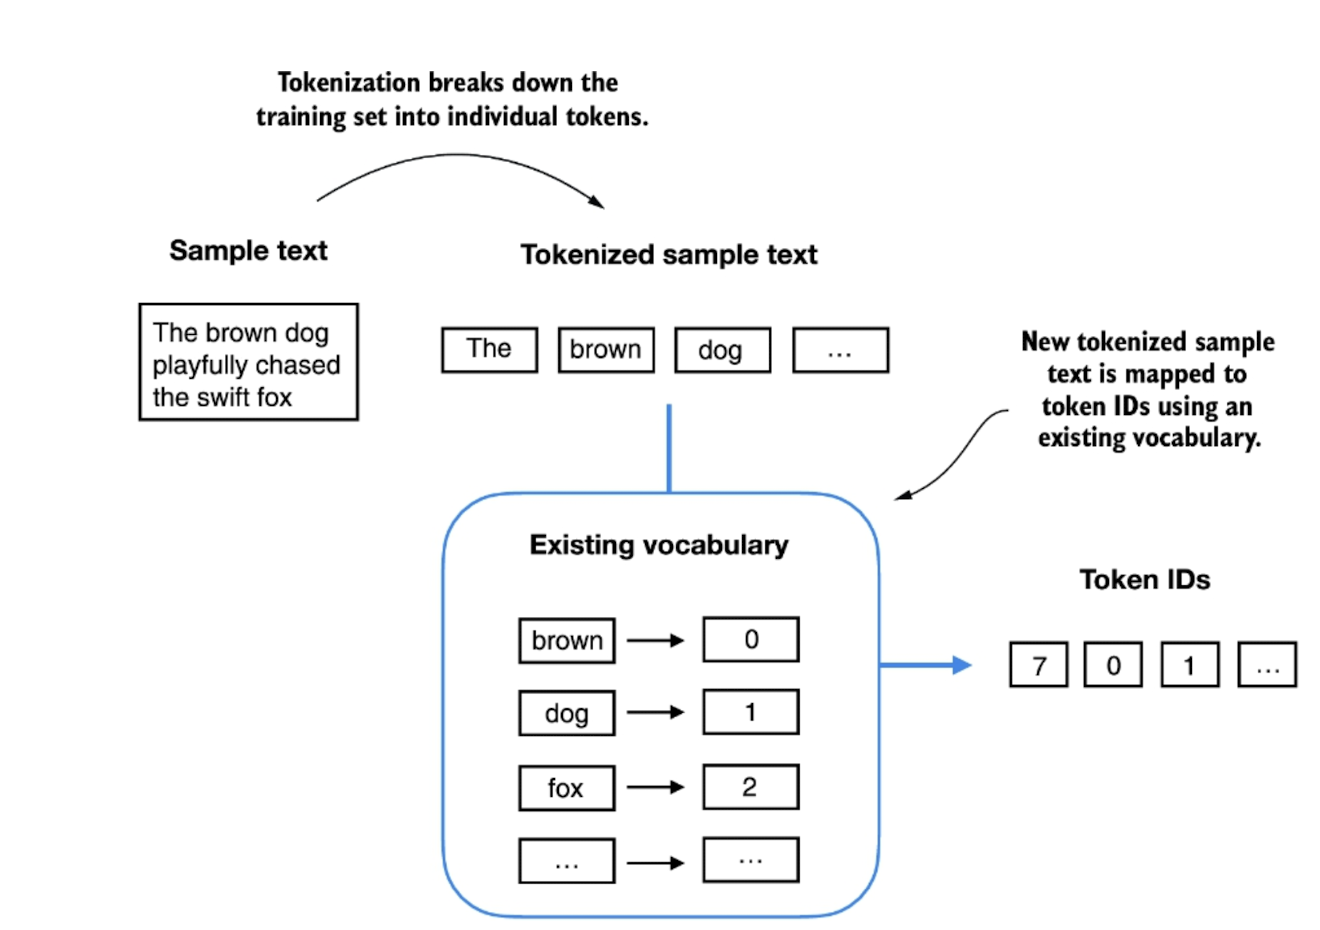

In [39]:
## Now we have Edith story tokenized 
## lets create a list of all unique tokens and sort them alphabetically.
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


* <b> Creating the Vocabulary

In [40]:
# enumerate class create the index and value
for index,token in enumerate(all_words):
    print(index, token)
    if index >=10:
        break

0 !
1 "
2 '
3 (
4 )
5 ,
6 --
7 .
8 :
9 ;
10 ?


In [41]:
vocab = {token:integer for integer, token in enumerate(all_words)}
# for i, item in enumerate(vocab.items()):
#     print(item)
#     if i >=10:
#         break

* <b>Implementing a simple text tokenizer.</b> <br>
We need string-to-integer and also reverse which is integer-to-string as we want to map the LLMs output back to text. <br>
- Encode method :splits text into tokens and carries out the string-to-integer mapping to produce token IDs via the vocabulary.
- Decode method: carries out the reverse integer-to-string mapping to convert the token IDs back into text.


In [42]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        ##1 Stores the vocabulary as a class attribute for access in the encode and decode methods
        self.str_to_int = vocab
        ##2 Creates an inverse vocabulary that maps token IDs back to the original text tokens
        self.int_to_str = {i:s for s,i in vocab.items() }
    #3 Processes input text into token IDs 
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        # removing whitespaces
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    #4 Converts token IDs back into text 
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids]) # adding spaces
        
        #5 Removes spaces before the specified punctuation
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [43]:
# intitiate new tokenizer object via existing vocab
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," 
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


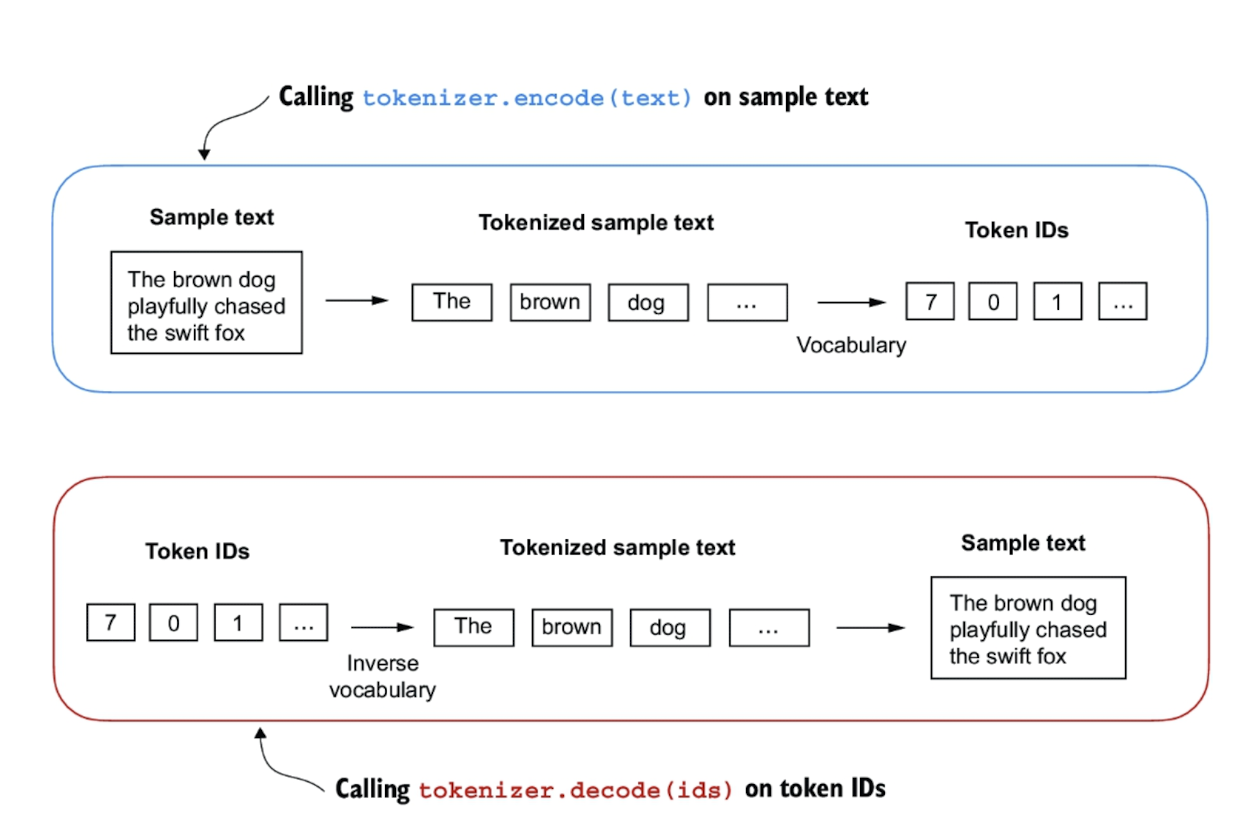

In [44]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [45]:
# Also we can do 

In [46]:
print(tokenizer.decode(tokenizer.encode(text)))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [47]:
# lets apply the our simple tokenizer to the text which are not part of training set

In [48]:
# text = "Hello! do you like green tea"
# print(tokenizer.encode(text))

The above error came due to the Hello word is not in the vocabulary. So this highlight the need of the large and diverse vocabulary when dealing with the LLMs.

* Further we will discuss the tokenizer use in unknown words and how we can improve further context in training LLMs.

## 2.4 Adding special context tokens

Let’s now modify the vocabulary to include these two special tokens, <unk> and <|endoftext|>, by adding them to our list of all unique words:


In [49]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [50]:
all_tokens =sorted(list(set(preprocessed)))
print(all_tokens[:30])

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed']


In [51]:
print(len(all_tokens))

1130


dict.items()
Returns: A view object with tuples of (key, value) pairs.
```python
d = {'a': 1, 'b': 2}
print(d.items())
# Output: dict_items([('a', 1), ('b', 2)])
```

In [52]:
##lets add the tokens
all_tokens =sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [53]:
# lets print the last 5 vocab 
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


It is confirmed now we have added the new two special tokens.
Now lets add this in our tokenizer class. We will make now <b>SimpleTokenizerV2

In [54]:
#simple text tokenizer that handles unknown words

class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items() }
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        # removing whitespaces
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        #1 Replaces unknown words by <|unk|> tokens
        preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids]) # adding spaces
        #2 Replaces spaces before the specified punctuations

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [55]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [56]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))


[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


We could clearly see code 1131 : for Hello i.e. unkown word and 1130 for |endoftext|

lets see the decoding

In [57]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


LLM researcher also use some of other special tokens as :
* [BOS] (beginning of sequence) —This token marks the start of a text. It signifies to the LLM where a piece of content begins.
* [EOS] (end of sequence) —This token is positioned at the end of a text and is especially useful when concatenating multiple unrelated texts, similar to <|endoftext|>. For instance, when combining two different Wikipedia articles or books, the [EOS] token indicates where one ends and the next begins.
* [PAD] (padding) —When training LLMs with batch sizes larger than one, the batch might contain texts of varying lengths. To ensure all texts have the same length, the shorter texts are extended or “padded” using the [PAD] token, up to the length of the longest text in the batch.

ChatGPT donnot use these special tokens except <|endoftext|>
* Moreover, the tokenizer used for GPT models also doesn’t use an <|unk|> token for out-of-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks words down into subword units, which we will discuss next.


## 2.5 Byte Pair Encoding

In [1]:
from importlib.metadata import version
import tiktoken
print("tiktoken version :",version("tiktoken"))

tiktoken version : 0.9.0


Intiate the BPE 

In [2]:
tokenizer = tiktoken.get_encoding("gpt2")

The usuage of the BPE is similar as we implmented the SimpleTokenizerV2


In [3]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)


[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [4]:
# decoding
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


<b> Exercise 2.1 Byte pair encoding of unknown words Try the BPE tokenizer from the tiktoken library on the unknown words “Akwirw ier” and print the individual token IDs. Then, call the decode function on each of the resulting integers in this list to reproduce the mapping shown in figure 2.11. Lastly, call the decode method on the token IDs to check whether it can reconstruct the original input, “Akwirw ier.”

In [5]:
tokenizer = tiktoken.get_encoding("gpt2")
text = ("Akwirw ier")
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[33901, 86, 343, 86, 220, 959]


In [6]:
strings = tokenizer.decode(integers)
print(strings)

Akwirw ier


### 2.6 Data Sampling with a sliding window

In [1]:
from importlib.metadata import version
import tiktoken
print("tiktoken version :",version("tiktoken"))

tiktoken version : 0.9.0


In [2]:
tokenizer = tiktoken.get_encoding("gpt2")

- lets read the story "The Verdict" and encode it using the BPE

In [3]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [4]:
print(len(raw_text))

20479


In [5]:
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


We have 5145 encoded in the training set

In [6]:
enc_samples = enc_text[50:] # removing 50
len(enc_samples)

5095

In [7]:
context_size = 4 # context size tells us how many tokens included in the input
x = enc_samples[:context_size] # x contains the input tokens
y = enc_samples[1:context_size+1] # target tokens
print(f"x: {x}")
print(f"y : {y}")

x: [290, 4920, 2241, 287]
y : [4920, 2241, 287, 257]


We will shift target by one possition

In [8]:
for i in range(1, context_size+1):
    print(i)

1
2
3
4


In [9]:
for i in range(1, context_size+1):
    context = enc_samples[:i]
    desired = enc_samples[i]
    print(context, "-->", desired)

[290] --> 4920
[290, 4920] --> 2241
[290, 4920, 2241] --> 287
[290, 4920, 2241, 287] --> 257



We have left side token id :--> input to LLM and right side target id 


lets convert the the token ids to the text again 

In [10]:
for i in range(1,context_size+1):
    
    context = enc_samples[:i]
    
    desired = enc_samples[i]
    
    print(tokenizer.decode(context), "--->", tokenizer.decode([desired]))


 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


Now we have created the input target pairs

In [11]:
### A dataset for the batched input and targets --> we will use the pytorch "Dataset" and "DataLoader" class

In [1]:
from importlib.metadata import version
import tiktoken
print("tiktoken version :",version("tiktoken"))

tiktoken version : 0.9.0


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
torch.__version__

'2.7.0'

**A Dataset class for batched input and output**

In [3]:
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids =[]
        self.target_ids = []

        token_ids = tokenizer.encode(txt) #1 Tokenizes the entire text

        #2 Uses a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0,len(token_ids) - max_length, stride):
            input_chunks = token_ids[i:i + max_length]
            target_chunks = token_ids[i+1 : i + max_length +1]
            self.input_ids.append(torch.tensor(input_chunks))
            self.target_ids.append(torch.tensor(target_chunks))

    def __len__(self): # 3. Returns the total number of rows in the dataset
        return len(self.input_ids)

    def __getitem__(self, idx): #4. Returns a single row from the dataset
        return self.input_ids[idx] , self.target_ids[idx]

        

The `GPTDatasetV1` class is based on the pytorch `Dataset` class and defines how individual rows will be fatched from the dataset. <br/>
Where each row consists of a number of token ids ( based on max_length) assigned to the input_chunks tensor.

- PyTorch implements a `Dataset` and a `DataLoader` class.
- The `Dataset` class is used to instantiate objects that define how each data record is loaded.
- The `DataLoader` handles how the data is shuffled and assembled into batches.

**A Dataloader to generate batches with input-with pairs**

In [4]:
def create_dataloader_v1(txt, batch_size=4, max_length= 256,
                         stride = 128, shuffle = True, drop_last= True,
                         num_workers = 0):
    
    tokenizer = tiktoken.get_encoding("gpt2") #1. Initializes the tokenizer
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #2. Create datasets
    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = shuffle,
        drop_last = True, #3. drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training.
        num_workers = num_workers #4. The number of CPU processes to use for preprocessing
    )

    return dataloader
    

Let's test the dataloader, lets take batch_size = 1, context size = 4

In [5]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1,shuffle=False)
data_iter = iter(dataloader) # #1 Converts dataloader into a Python iterator to fetch the next entry via Python’s built-in next() function
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


The `first_batch` variable contains two tensors: the first tensor stores the input *token IDs*, and the second tensor stores the *target token IDs*. Since the *max_length* is set to 4, each of the two tensors contains four token IDs. Note that an input size of 4 is quite small and only chosen for simplicity. It is common to train LLMs with input sizes of at least 256.

To understand the meaning of `stride=1`, let’s fetch another batch from this dataset:

In [6]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


If we compare the first and second batches, we can see that the second batch’s token IDs are shifted by one position (for example, the second ID in the first batch’s input is 367, which is the first ID of the second batch’s input). The stride setting dictates the number of positions the inputs shift across batches, emulating a sliding window approach, as demonstrated in figure
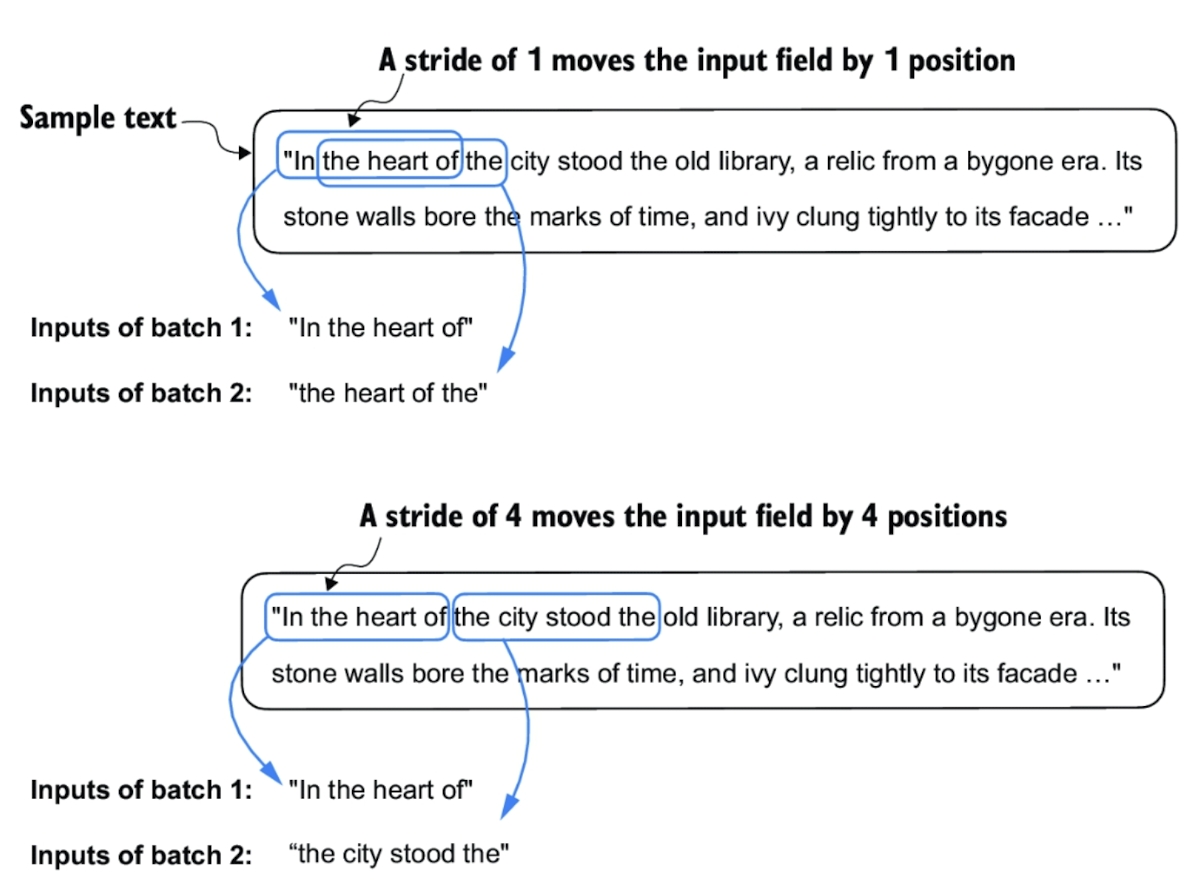
When creating multiple batches from the input dataset, we slide an input window across the text. If the stride is set to 1, we shift the input window by one position when creating the next batch. If we set the stride equal to the input window size, we can prevent overlaps between the batches.



**Exercise 2.2** Data loaders with different strides and context sizes To develop more intuition for how the data loader works, try to run it with different settings such as `max_length=2` and `stride=2`, and `max_length=8` and `stride=2`.

In [7]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=2, stride=2,shuffle=False)
data_iter = iter(dataloader) # #1 Converts dataloader into a Python iterator to fetch the next entry via Python’s built-in next() function
first_batch = next(data_iter)
print(first_batch)

[tensor([[ 40, 367]]), tensor([[ 367, 2885]])]


In [8]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[2885, 1464]]), tensor([[1464, 1807]])]


In [9]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=8, stride=2,shuffle=False)
data_iter = iter(dataloader) # #1 Converts dataloader into a Python iterator to fetch the next entry via Python’s built-in next() function
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464, 1807, 3619,  402,  271]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899]])]


In [10]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138]]), tensor([[ 1464,  1807,  3619,   402,   271, 10899,  2138,   257]])]


Batch sizes of 1, such as we have sampled from the data loader so far, are useful for illustration purposes. If you have previous experience with deep learning, you may know that: <br/>
- ***small batch sizes require less memory during training*** but lead to more **noisy model updates**. Just like in regular deep learning, the batch size is a tradeoff and a hyperparameter to experiment with when training LLMs.

Let’s look briefly at how we can use the data loader to sample with a batch size greater than 1:

In [11]:
dataloader = create_dataloader_v1(
    raw_text,
    batch_size=8,
    max_length=4,
    stride=4,
    shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("inputs:\n", inputs)
print("targets:\n", targets)
                                  

inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


Note that we increase the stride to 4 to utilize the data set fully (we don’t skip a single word). This avoids any overlap between the batches since more overlap could lead to increased overfitting.

### 2.7 Creating token embeddings

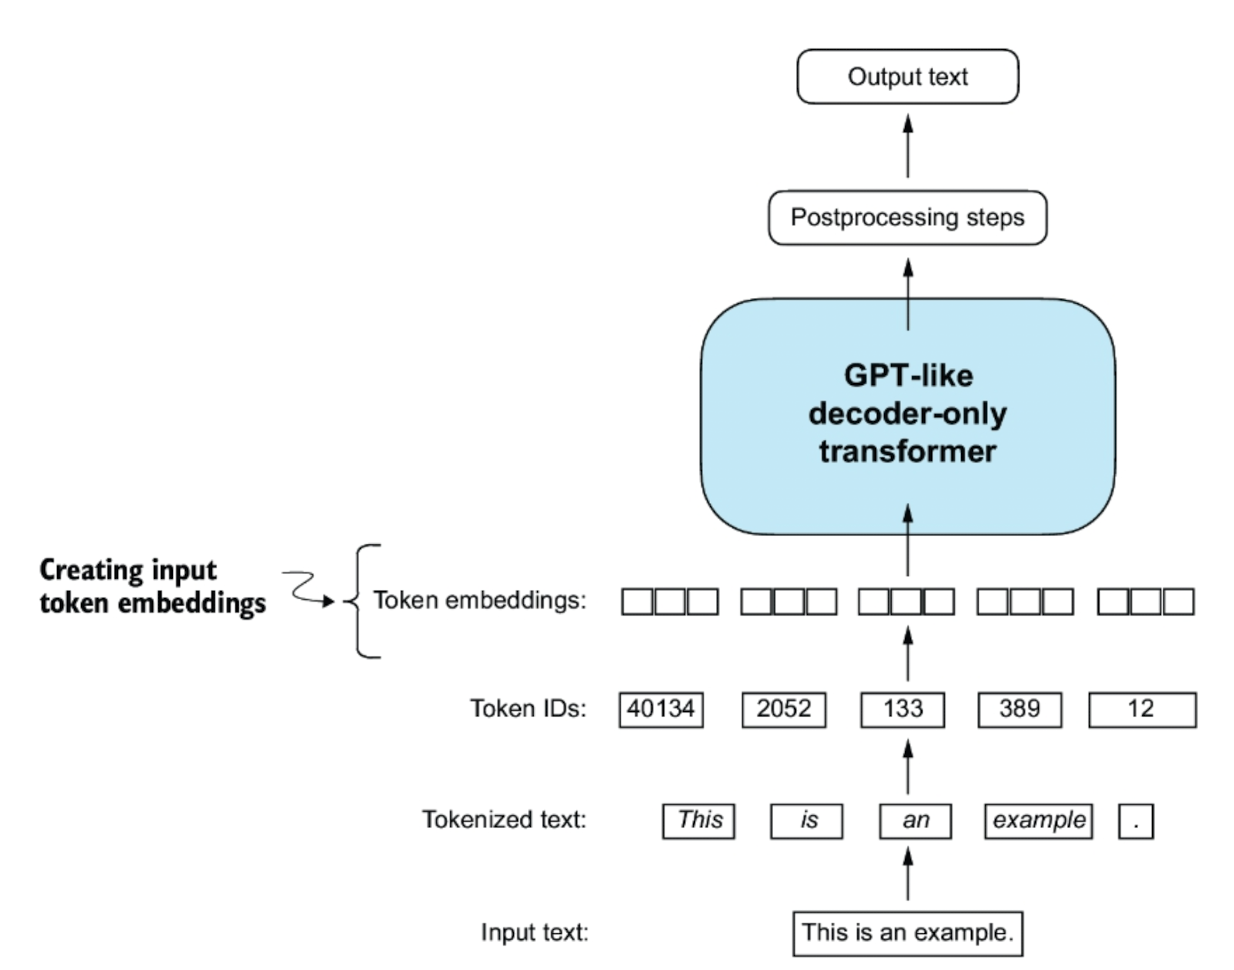

- Preparation involves tokenizing text, converting text tokens to token IDs, and converting token IDs into embedding vectors. Here, we consider the previously created token IDs to create the token embedding vectors.
- A continuous vector representation, or embedding, is necessary since GPT-like LLMs are deep neural networks trained with the backpropagation algorithm.<br/>
Let’s see how the token ID to embedding vector conversion works with a hands-on example. Suppose we have the following four input tokens with IDs 2, 3, 5, and 1:


In [12]:
input_ids = torch.tensor([2,3,5,1])

For the sake of simplicity, suppose we have a small vocabulary of only 6 words (instead of the 50,257 words in the BPE tokenizer vocabulary), and we want to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

In [13]:
vocab_size = 6
output_dim = 3

Using the `vocab_size` and `output_dim`, we can instantiate an embedding layer in PyTorch, setting the `random seed` to `123` for reproducibility purposes:


In [14]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size,output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


The weight matrix of the embedding layer contains small, random values. These values are optimized during LLM training as part of the LLM optimization itself. Moreover, we can see that the weight matrix has six rows and three columns. There is one row for each of the six possible tokens in the vocabulary, and there is one column for each of the three embedding dimensions.

In [15]:
# Now, let’s apply it to a token ID to obtain the embedding vector:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


If we compare the embedding vector for `token ID 3` to the previous embedding matrix, we see that it is identical to the fourth row (Python starts with a zero index, so it’s the row corresponding to index 3). **In other words, the embedding layer is essentially a `lookup operation` that retrieves rows from the embedding layer’s weight matrix via a token ID.**

**Note**  For those who are familiar with one-hot encoding, the embedding layer approach described here is essentially just a more efficient way of implementing one-hot encoding followed by matrix multiplication in a fully connected layer, which is illustrated in the supplementary code on GitHub at `https://mng.bz/ZEB5`. Because the embedding layer is just a more efficient implementation equivalent to the one-hot encoding and matrix-multiplication approach, it can be seen as a neural network layer that can be optimized via backpropagation.


We’ve seen how to convert a single token ID into a three-dimensional embedding vector. Let’s now apply that to all four input IDs `(torch.tensor([2, 3, 5, 1]))`:



In [16]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


- Each row in this output matrix is obtained via a lookup operation from the embedding weight matrix,

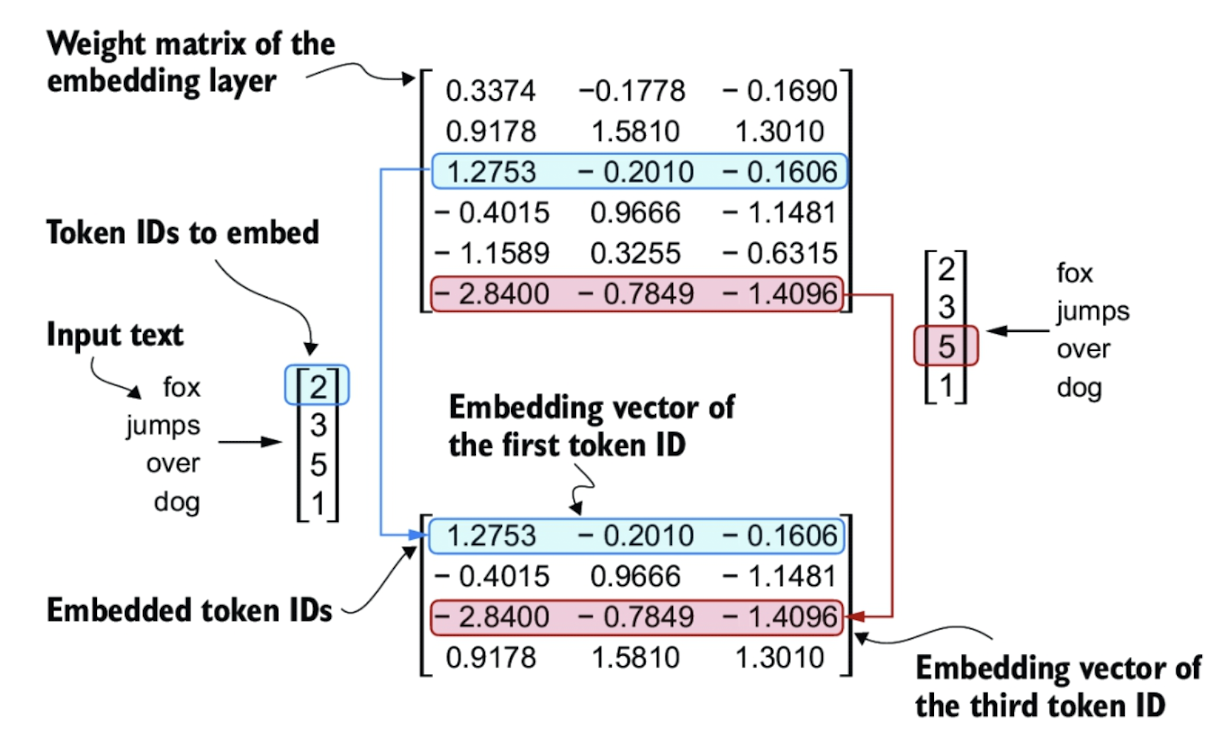

- Embedding layers perform a lookup operation, retrieving the embedding vector corresponding to the token ID from the embedding layer’s weight matrix. For instance, the embedding vector of the token ID 5 is the sixth row of the embedding layer weight matrix (it is the sixth instead of the fifth row because Python starts counting at 0). We assume that the token IDs were produced by the small vocabulary from section 2.3.
- No we will encode the possition information into the tokens


### 2.8 Encoding word positions

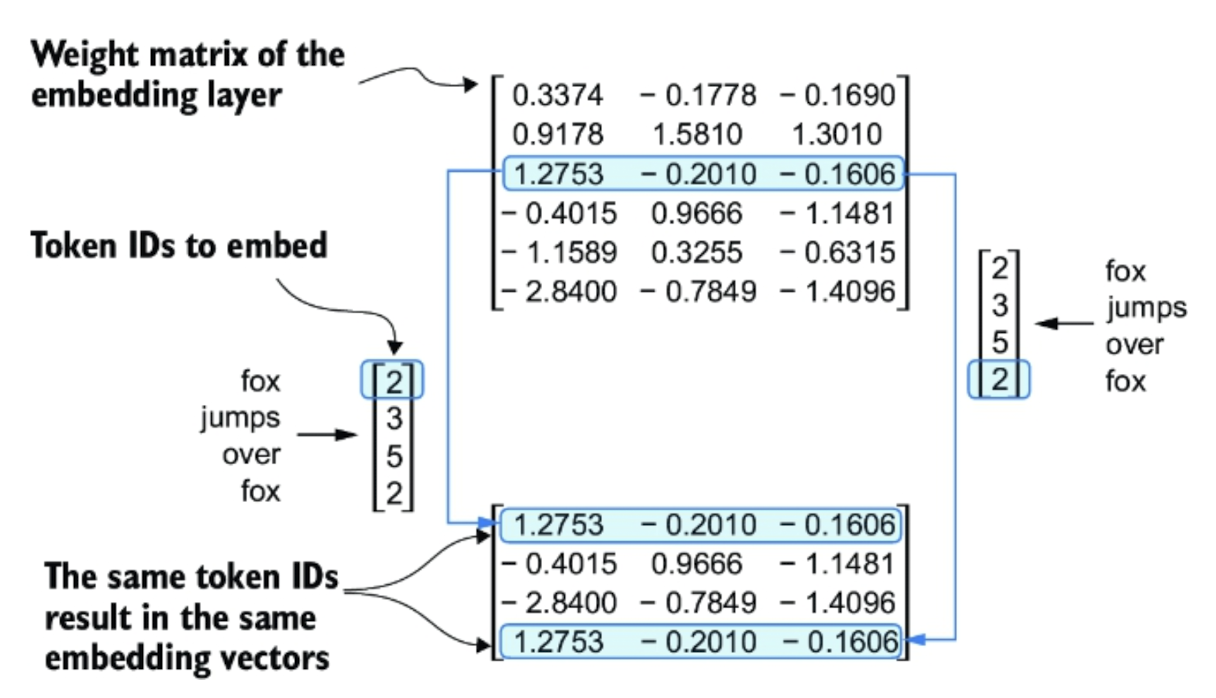

- The embedding layer converts a token ID into the same vector representation regardless of where it is located in the input sequence. For example, the token ID 5, whether it’s in the first or fourth position in the token ID input vector, will result in the same embedding vector.
- Similar situation is there with the self attention mechanism.
- In principle, the deterministic, position-independent embedding of the token ID is good for reproducibility purposes. However, since the **self-attention mechanism** of LLMs itself is also ***position-agnostic****, it is helpful to inject additional position information into the LLM.



- To achieve this, we can use two broad categories of position-aware embeddings:
    - relative positional embeddings :
    - absolute positional embeddings:Absolute positional embeddings are directly associated with specific positions in a sequence. For each position in the input sequence, a unique embedding is added to the token’s embedding to convey its exact location. For instance, the first token will have a specific positional embedding, the second token another distinct embedding, and so on, as illustrated in figure
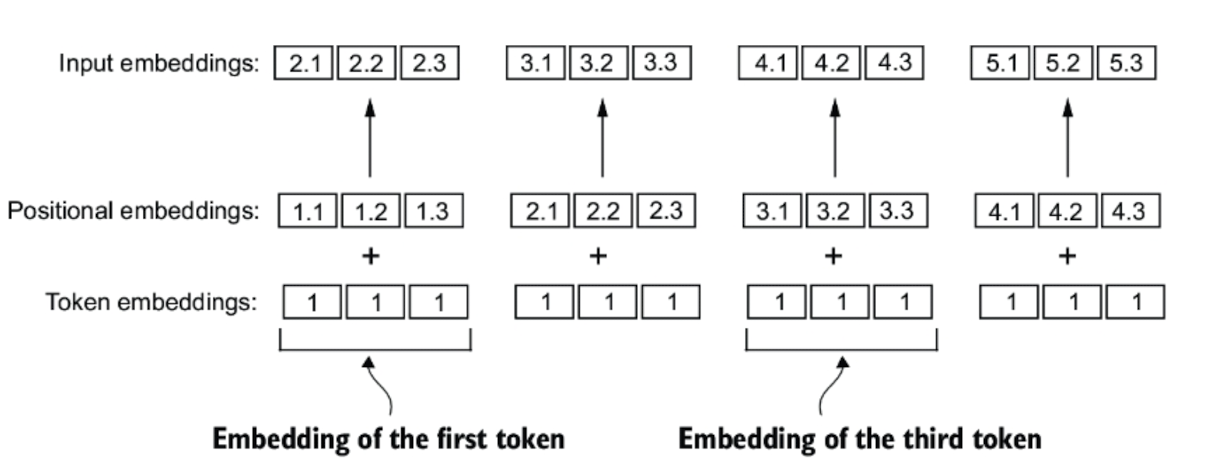

Positional embeddings are added to the token embedding vector to create the input embeddings for an LLM. The positional vectors have the same dimension as the original token embeddings. The token embeddings are shown with value 1 for simplicity.

Instead of focusing on the absolute position of a token, the emphasis of relative positional embeddings is on the relative position or distance between tokens. This means the model learns the relationships in terms of “how far apart” rather than `“at which exact position.”` The advantage here is that the model can generalize better to sequences of varying lengths, even if it hasn’t seen such lengths during training.


OpenAI’s GPT models use absolute positional embeddings that are optimized during the training process rather than being fixed or predefined like the positional encodings in the original transformer model. This optimization process is part of the model training itself. For now, let’s create the initial positional embeddings to create the LLM inputs.

Previously, we focused on very small embedding sizes for simplicity. Now, let’s consider more realistic and useful embedding sizes and encode the input tokens into a 256-dimensional vector representation, which is smaller than what the original GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable for experimentation. Furthermore, we assume that the token IDs were created by the BPE tokenizer we implemented earlier, which has a vocabulary size of 50,257:

In [18]:
vocab_size = 50257
out_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, out_dim)

Using the previous `token_embedding_layer`, if we sample data from the data loader, we embed each token in each batch into a `256-dimensional` vector. If we have a `batch size` of `8` with `four tokens each`, the result will be an `8 × 4 × 256` tensor.

In [20]:
# Let’s instantiate the data loader (see section 2.6) first:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text,
    batch_size=8,
    max_length= max_length,
    stride= max_length,
    shuffle= False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Input Token IDs :\n", inputs)
print("\n Input shapes :\n",inputs.shape)


Input Token IDs :
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

 Input shapes :
 torch.Size([8, 4])


- As we can see, the token ID tensor is 8 × 4 dimensional, meaning that the data batch consists of eight text samples with four tokens each.
- Let’s now use the embedding layer to embed these token IDs into 256-dimensional vectors:

In [23]:
token_embedding = token_embedding_layer(inputs)
print(token_embedding.shape)

torch.Size([8, 4, 256])


- The 8 × 4 × 256–dimensional tensor output shows that each token ID is now embedded as a 256-dimensional vector.
- For a GPT model’s absolute embedding approach, we just need to create another embedding layer that has the same embedding dimension as the token_embedding_ layer:


In [24]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding( context_length, out_dim) # context length are the number of token taken at a time : rows 
pos_embedding = pos_embedding_layer(torch.arange(context_length))
print(pos_embedding.shape)

torch.Size([4, 256])


- The input to the pos_embeddings is usually a placeholder vector torch.arange(context_length), which contains a sequence of numbers 0, 1, ..., up to the maximum input length –1. The context_length is a variable that represents the supported input size of the LLM. Here, we choose it similar to the maximum length of the input text. In practice, input text can be longer than the supported context length, in which case we have to truncate the text.
- As we can see, the positional embedding tensor consists of four 256-dimensional vectors. We can now add these directly to the token embeddings, where PyTorch will add the 4 × 256–dimensional pos_embeddings tensor to each 4 × 256–dimensional token embedding tensor in each of the eight batches:

In [25]:
input_embeddings = token_embedding + pos_embedding
print(input_embeddings.shape)

torch.Size([8, 4, 256])


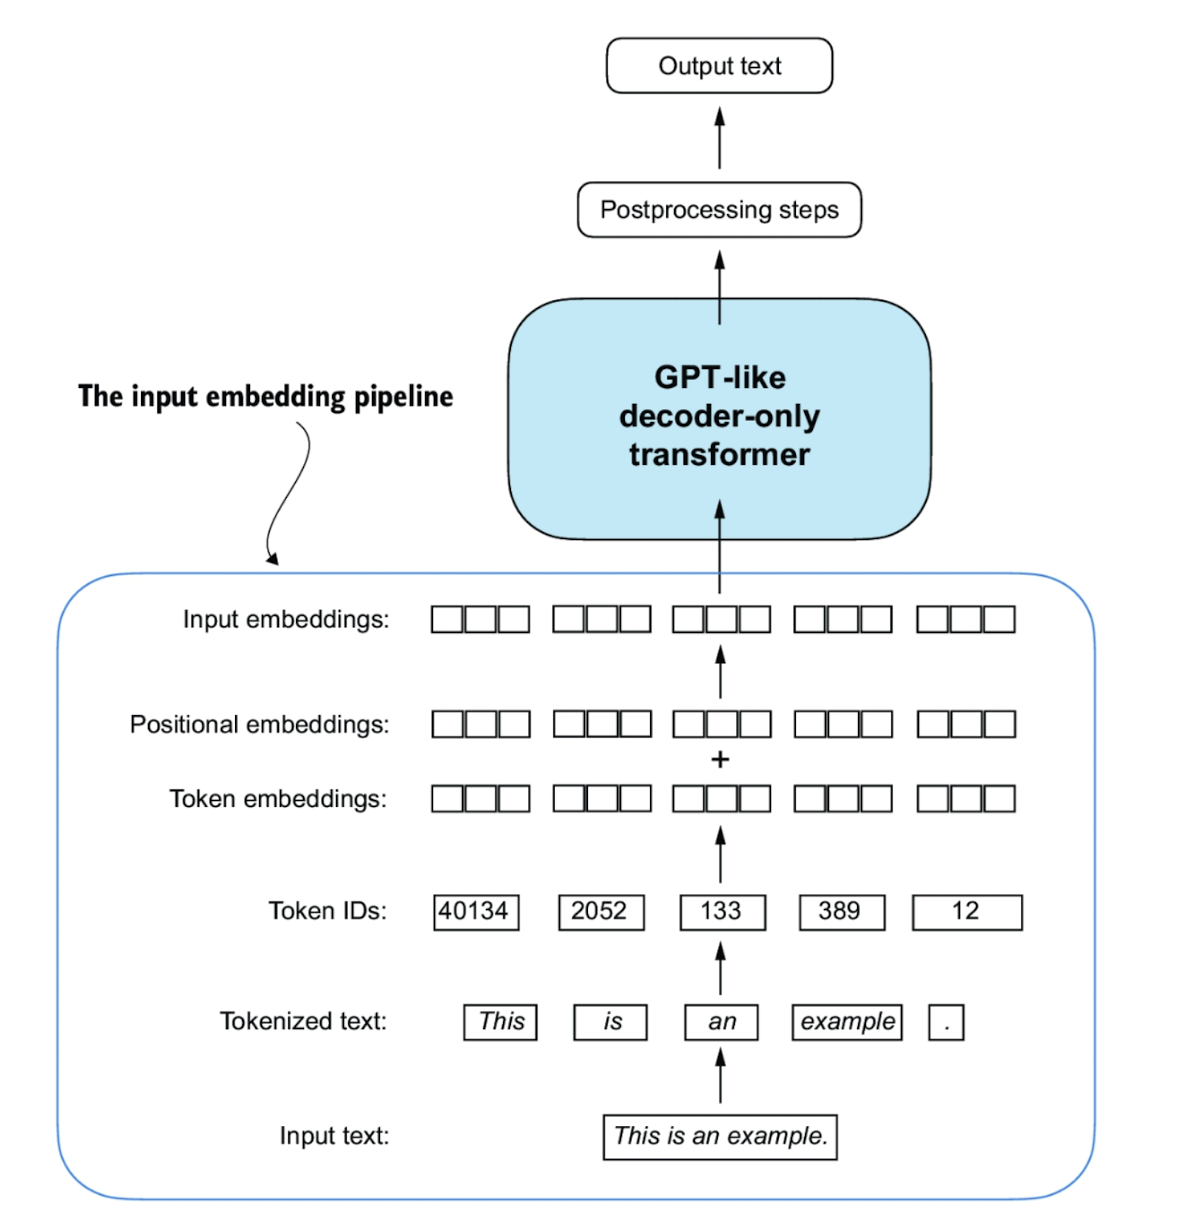

- As part of the input processing pipeline, input text is first broken up into individual tokens. These tokens are then converted into token IDs using a vocabulary. The token IDs are converted into embedding vectors to which positional embeddings of a similar size are added, resulting in input embeddings that are used as input for the main LLM layers.



### Summary

- LLMs require textual data to be converted into numerical vectors, known as embeddings, since they can’t process raw text. Embeddings transform discrete data (like words or images) into continuous vector spaces, making them compatible with neural network operations.

- As the first step, raw text is broken into tokens, which can be words or characters. Then, the tokens are converted into integer representations, termed token IDs.

- Special tokens, such as <|unk|> and <|endoftext|>, can be added to enhance the model’s understanding and handle various contexts, such as unknown words or marking the boundary between unrelated texts.

- The byte pair encoding (BPE) tokenizer used for LLMs like GPT-2 and GPT-3 can efficiently handle unknown words by breaking them down into subword units or individual characters.

- We use the sliding window approach on the token ids to create the input target pairs

- Embedding layer is Pytorch function retreive the look up operation for the token IDs. Resulting embedding vector represent the continous representation of tokens, which are critical for LLM training.

- While token embedding provide the consistent vector reprsentation but lacks the possition of words in the sequence. So there are 2 possitional encoding 1) relative and 2) absolute. GPT model utilized the absolute possitional enconding and encoding is updated while training the model.



In [26]:
# --- Lets move to chapter 3 ---- 